# 🚀 **LaunchVision: Real-Time Space Mission Insights**

### Import Required Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


###  Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/My Drive/Colab Notebooks/space_mission_data.csv'

In [ ]:
data=pd.read_csv(file_path)

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


 ### Dataset Overview

In [ ]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 4324
Number of columns: 9


In [ ]:
# Check for missing values
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


### Descriptive Statistics

In [ ]:
# Summary statistics for numerical columns
data.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [ ]:
# Unique values in categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")

Organisation: 56 unique values
Location: 137 unique values
Date: 4319 unique values
Detail: 4278 unique values
Rocket_Status: 2 unique values
Price: 56 unique values
Mission_Status: 4 unique values


###  Data Cleaning

In [ ]:
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.head()

,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


In [ ]:
if 'Unnamed: 0.1' in data.columns:
    data.drop(columns=['Unnamed: 0.1'], inplace=True)

In [ ]:
data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


### # Convert Date column to datetime

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [ ]:
data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145,Success


In [ ]:
# Summary statistics for numerical columns
data.describe()

# Unique values in categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")


Organisation: 56 unique values
Location: 137 unique values
Detail: 4278 unique values
Rocket_Status: 2 unique values
Price: 56 unique values
Mission_Status: 4 unique values


# Data Cleaning

In [ ]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Handle missing Price values (fill with median or 0)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Price'] = data['Price'].fillna(data['Price'].median())

# Strip extra spaces in categorical data
data = data.apply(lambda x: x.strip() if isinstance(x, str) else x, axis=1)

In [ ]:
data.head(2)
data.isnull().count()

,0
Organisation,4324
Location,4324
Date,4324
Detail,4324
Rocket_Status,4324
Price,4324
Mission_Status,4324


# Univariate Analysis

/tmp/ipython-input-2364922937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Organisation', order=data['Organisation'].value_counts().index, palette="viridis")


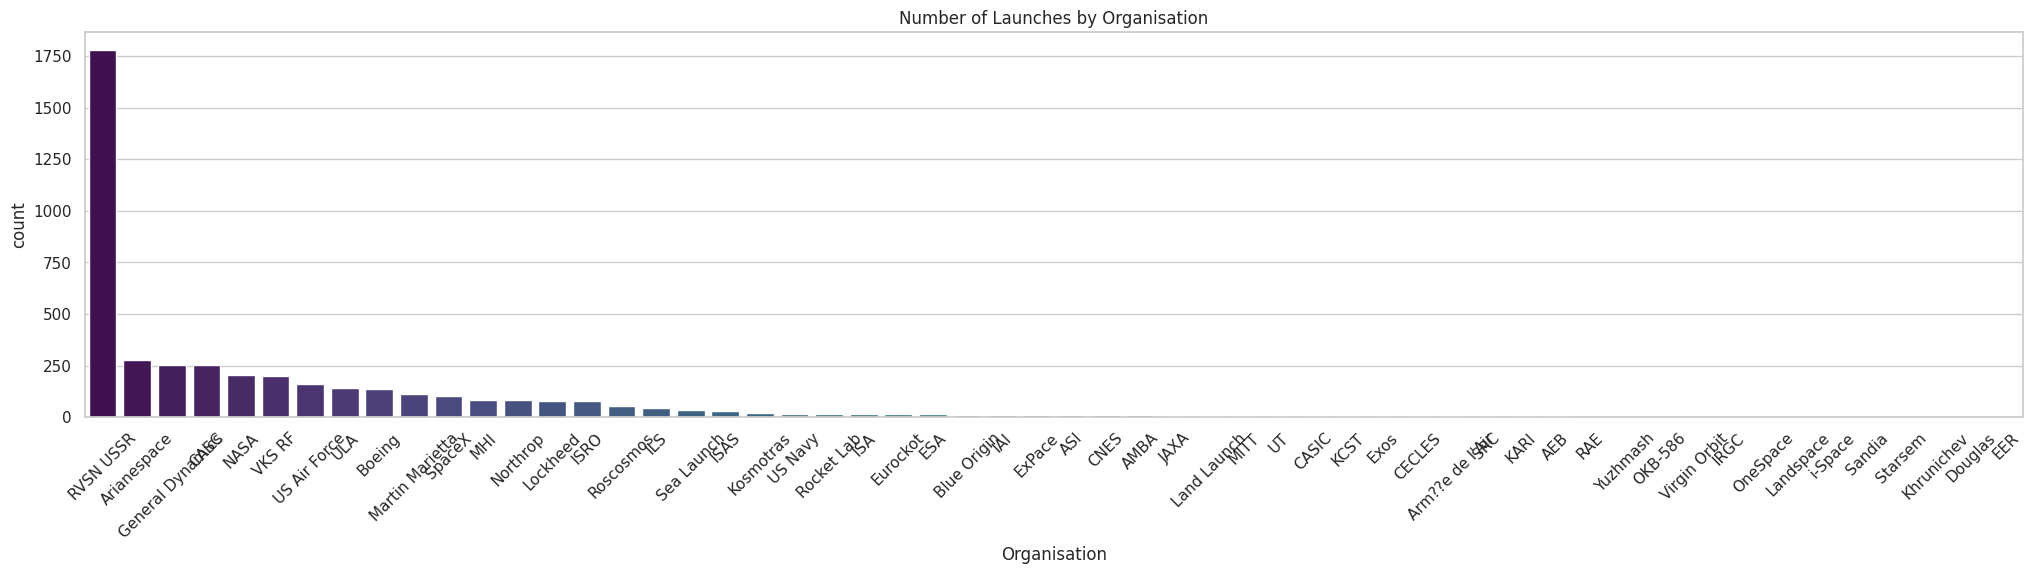

/tmp/ipython-input-2364922937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Mission_Status', palette="Set2")


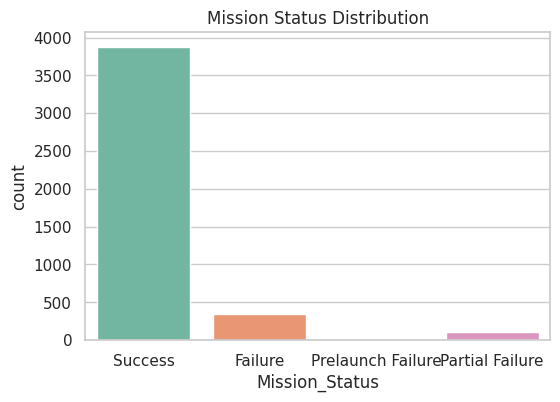

In [ ]:
# Count of launches by Organisation
plt.figure(figsize=(25,5))
sns.countplot(data=data, x='Organisation', order=data['Organisation'].value_counts().index, palette="viridis")
plt.title("Number of Launches by Organisation")
plt.xticks(rotation=45)
plt.show()

# Mission Status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Mission_Status', palette="Set2")
plt.title("Mission Status Distribution")
plt.show()

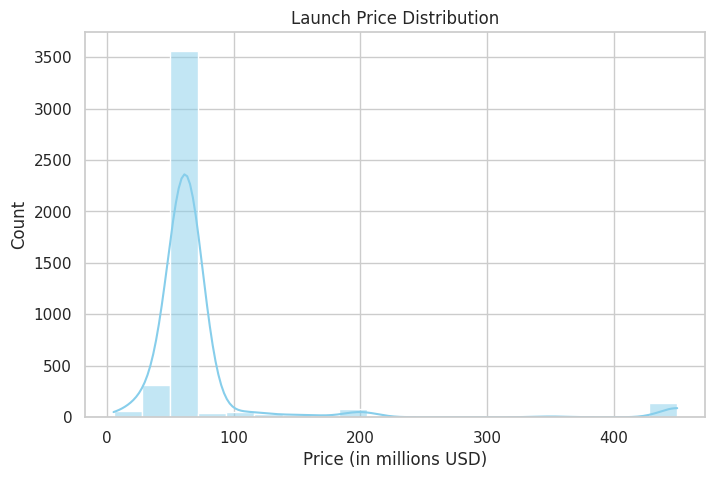

/tmp/ipython-input-251907931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Rocket_Status', palette="coolwarm")


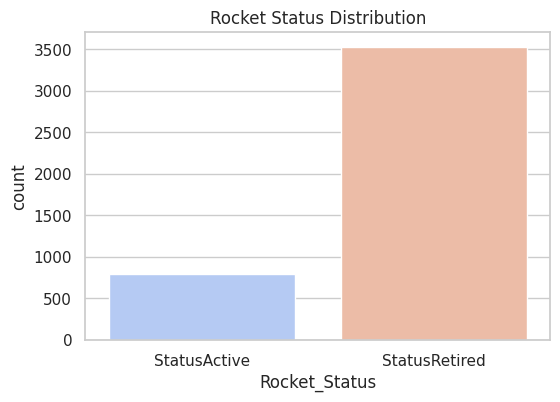

In [ ]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], bins=20, kde=True, color="skyblue")
plt.title("Launch Price Distribution")
plt.xlabel("Price (in millions USD)")
plt.show()

# Rocket Status count
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Rocket_Status', palette="coolwarm")
plt.title("Rocket Status Distribution")
plt.show()

# Price vs Organisation

/tmp/ipython-input-3279060882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Organisation', y='Price', palette="pastel")


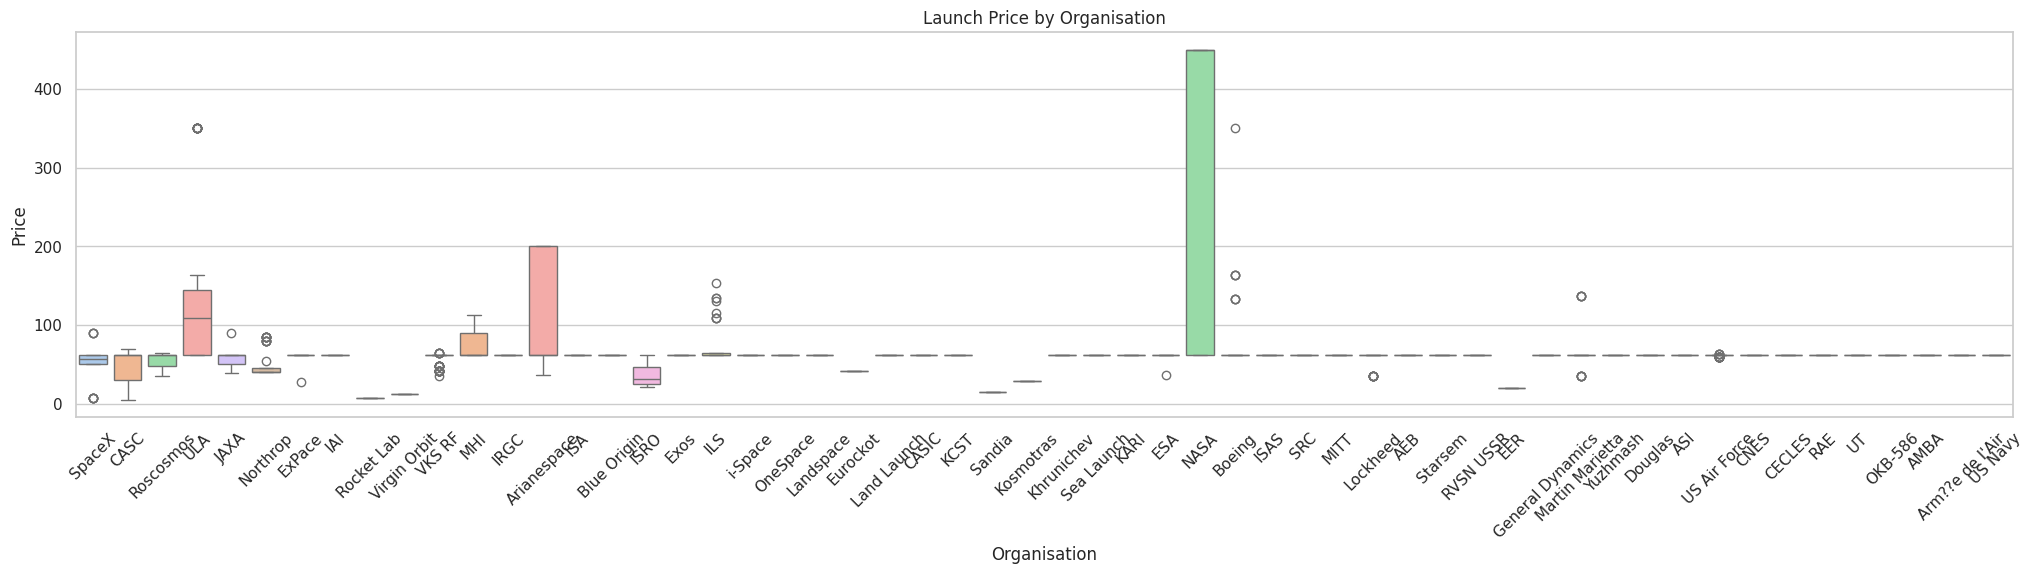

In [ ]:
plt.figure(figsize=(25,5))
sns.boxplot(data=data, x='Organisation', y='Price', palette="pastel")
plt.title("Launch Price by Organisation")
plt.xticks(rotation=45)
plt.show()

# Insights Summary

In [ ]:
# Example printed insights
print("Key Insights:")
print(f"- Total launches: {data.shape[0]}")
print(f"- Organisations involved: {data['Organisation'].nunique()}")
print(f"- Most frequent organisation: {data['Organisation'].value_counts().idxmax()}")
print(f"- Most common mission status: {data['Mission_Status'].value_counts().idxmax()}")
print(f"- Average launch price: ${data['Price'].mean():.2f} million")

Key Insights:
- Total launches: 4324
- Organisations involved: 56
- Most frequent organisation: RVSN USSR
- Most common mission status: Success
- Average launch price: $76.88 million


# **Model Building**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# XGBoost (safe import)
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False


In [ ]:
# 1) Fix common typo if present
if 'Oraganization' in data.columns and 'Organisation' not in data.columns:
    data.rename(columns={'Oraganization': 'Organisation'}, inplace=True)

# 2) Ensure required columns exist
required_cols = ['Organisation','Detail','Location','Rocket_Status','Mission_Status','Price']
missing = [c for c in required_cols if c not in data.columns]
if missing:
    raise ValueError(f"Missing columns in data: {missing}")

# 3) Make sure Price is numeric
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# 4) Drop rows where Price is missing (or you can fill with median)
data = data.dropna(subset=['Price']).reset_index(drop=True)


In [ ]:
# We will treat even numeric-coded categories as strings to be safe/consistent
cat_cols = ['Organisation','Detail','Location','Rocket_Status','Mission_Status']

# Keep a copy of raw for reference (optional)
data_raw_for_ref = data[cat_cols + ['Price']].copy()

# Cast to string for stable categorical handling
X_cats = data[cat_cols].astype(str)
y = data['Price'].values

# OrdinalEncoder that won’t crash on unseen categories
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_enc_np = ord_enc.fit_transform(X_cats)

# Create encoded columns in the exact names you want
enc_col_names = ['Organisation_encoded','Detail_encoded','Location_encoded','Rocket_Status_encoded','Mission_Status_encoded']
X_enc_df = pd.DataFrame(X_enc_np, columns=enc_col_names, index=data.index)

# Your EXACT X definition/order
X = X_enc_df[enc_col_names]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
results = {}
models = {}

# 1) Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Linear Regression'] = {
    'R2': r2_score(y_test, y_pred_lr),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
}
models['Linear Regression'] = lr

# 2) Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
}
models['Random Forest'] = rf

# 3) XGBoost Regressor (if available)
if HAS_XGB:
    xgb = XGBRegressor(
        n_estimators=400,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        reg_lambda=1.0
    )
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    results['XGBoost'] = {
        'R2': r2_score(y_test, y_pred_xgb),
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    }
    models['XGBoost'] = xgb

# Show summary
for m, met in results.items():
    print(f"{m}: R2={met['R2']:.4f}, MAE={met['MAE']:.4f}, RMSE={met['RMSE']:.4f}")

# Pick best by R2
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]
print(f"\n✅ Best model by R²: {best_model_name}")


Linear Regression: R2=0.0819, MAE=32.1313, RMSE=59.6755
Random Forest: R2=0.9961, MAE=0.6713, RMSE=3.8857
XGBoost: R2=0.9933, MAE=1.0127, RMSE=5.1089

✅ Best model by R²: Random Forest


In [ ]:
def predict_price_from_raw(unseen_dict, model):
    """
    unseen_dict keys: Organisation, Detail, Location, Rocket_Status, Mission_Status
    Values can be strings or numeric codes; all cast to string for encoding.
    """
    # Ensure all required keys exist
    keys_needed = ['Organisation','Detail','Location','Rocket_Status','Mission_Status']
    for k in keys_needed:
        if k not in unseen_dict:
            raise ValueError(f"Missing key in input: {k}")

    # Create single-row DataFrame and cast to string (stable with OrdinalEncoder)
    unseen_df = pd.DataFrame([{k: str(unseen_dict[k]) for k in keys_needed}])

    # Encode with the SAME encoder; unseen values -> -1 (no crash)
    unseen_enc_np = ord_enc.transform(unseen_df[keys_needed])

    # Put into the exact encoded column names / order
    unseen_enc_df = pd.DataFrame(unseen_enc_np, columns=enc_col_names)

    # Predict
    pred = model.predict(unseen_enc_df[enc_col_names])[0]
    return float(pred)


In [ ]:
# Example 1: values similar to your dataset style (strings + numeric codes)
unseen_launch_1 = {
    "Organisation": "SpaceX",
    "Detail": "Falcon 9 Block 5 | Starlink V1 L12",  # even if unseen, encoder maps to -1 safely
    "Location": 35,             # numeric code ok
    "Rocket_Status": 0,         # numeric code ok
    "Mission_Status": 3         # numeric code ok
}
pred1 = predict_price_from_raw(unseen_launch_1, best_model)
print(f"Predicted Price (Example 1): {pred1:.2f} million USD")

# Example 2: all as strings
unseen_launch_2 = {
    "Organisation": "CASC",
    "Detail": "Long March 2D | Gaofen-9 04 & Q-SAT",
    "Location": "Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China",
    "Rocket_Status": "StatusActive",
    "Mission_Status": "Success"
}
pred2 = predict_price_from_raw(unseen_launch_2, best_model)
print(f"Predicted Price (Example 2): {pred2:.2f} million USD")


Predicted Price (Example 1): 196.68 million USD
Predicted Price (Example 2): 29.75 million USD


In [ ]:
import joblib

# Save best model
joblib.dump(best_model, "best_model.pkl")

# Save the encoder
joblib.dump(ord_enc, "encoder.pkl")

print("✅ best_model.pkl and encoder.pkl saved successfully!")


✅ best_model.pkl and encoder.pkl saved successfully!
